In [1]:
# LDA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
dataset.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [6]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [7]:
print(X_test)

[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
 [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
  1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.156e+01 2.050e+00 3.230e+00 2.850e+01 1.190e+02 3.180e+00 5.080e+00
  4.700e-01 1.870e+00 6.000e+00 9.300e-01 3.690e+00 4.650e+02]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
  3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
 [1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800e+01 2.3

In [8]:
print(X_train)

[[1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 ... 1.160e+00 2.960e+00 3.450e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [9]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [10]:
print(y_train)

[3 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1
 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2
 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3
 1 3 3 3 1 2 2 2 2 3 3 2 2 1 2 3 3 1 1 3 2 2 2 1 1 1 2 2 2 1 3]


In [11]:
print(y_test)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


In [14]:
print(X_test)

[[ 9.38847070e-01 -6.32166068e-01 -4.35010303e-01 -9.19695615e-01
   1.26324041e+00  5.59998633e-01  9.77754158e-01 -1.20637533e+00
   2.36680192e-02  3.39284695e-01 -1.45574805e-01  8.52295413e-01
   1.04940526e+00]
 [-2.42263344e-01  2.67579163e-01  4.20859365e-01  7.12764102e-01
   8.40672358e-01 -1.27747161e+00 -6.05828120e-01 -9.70634096e-01
  -5.87397203e-01  2.42611713e+00 -2.06608025e+00 -1.55017035e+00
  -8.66598582e-01]
 [-7.64438475e-01 -1.11802849e+00 -7.69915825e-01 -1.61767889e-01
  -9.20027861e-01  2.03653722e+00  1.18341419e+00 -1.36353615e+00
   4.48018868e-01 -2.50930538e-01  1.16386073e+00  3.94021597e-01
  -1.06480588e+00]
 [ 7.15057728e-01 -5.78181354e-01  3.46435916e-01  2.75498106e-01
   1.12238439e+00  1.15061407e+00  8.54358136e-01 -1.28495574e+00
   1.43251284e+00  5.07917619e-01  1.16312302e-01  6.16214963e-01
   1.24761256e+00]
 [ 8.09879269e-02  3.08378173e+00 -8.81550999e-01  5.67008770e-01
  -9.90455870e-01  5.92810602e-01  7.20679112e-01 -4.99151627e-01


In [15]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [16]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


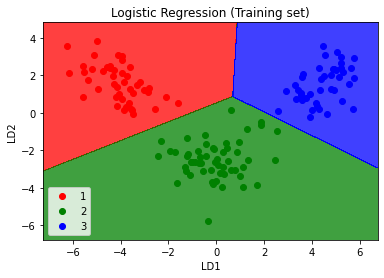

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


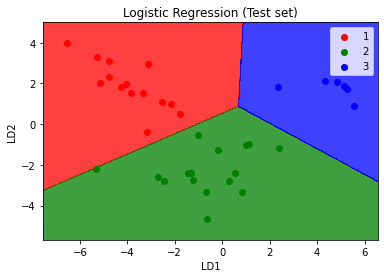

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()